In [16]:
import sys
import os
import sys
import os
# Add the parent directory of TRVQA to sys.path
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../..')))
from TRVQA.measure.enums import MeasureMethod
from TRVQA.optimization.gradients.vanilla_parameter_shift import vanilla_parameter_shift
from TRVQA.optimization.optimization import minimize, minimize_custom
from TRVQA.utils.maxcut import gengraph, create_hamiltonian, make_hamiltonian
import torch
from torch.autograd import Function
from qiskit.circuit.library import QAOAAnsatz
from qiskit.quantum_info import SparsePauliOp, Statevector
from qiskit import QuantumCircuit

import numpy as np
import torch
from TRVQA.circuit import Circuit

def compute_maxcut_value(bitstring, graph):
    """Computes the MaxCut value for a given bitstring solution."""
    cut_value = sum(w for (u,v), w in graph if bitstring[u] != bitstring[v])
    return cut_value

# for s in best_value:
#     print(compute_maxcut_value(s, g))

from pyparsing import Optional
import torch
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp
from TRVQA.optimization.optimization import minimize, minimize_custom
# TRVQA imports

from TRVQA.circuit import Circuit
from TRVQA.hamiltonian.hamiltonian import Hamiltonian
from TRVQA.measure.enums import MeasureMethod
torch.cuda.empty_cache()
import numpy as np
import torch
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp
import torch

from TRVQA.measure.enums import MeasureMethod
from TRVQA.optimization.optimization import minimize
from TRVQA.utils.maxcut import gengraph, create_hamiltonian,make_hamiltonian
from TRVQA.hamiltonian.hamiltonian import Hamiltonian
import numpy as np
import torch
from TRVQA.circuit import Circuit
import time


In [17]:
import numpy as np
import gurobipy as gp
from gurobipy import GRB

def solve_tsp_gurobi(distance_matrix):
    """
    Solve TSP given distance matrix using Gurobi.
    """
    N = distance_matrix.shape[0]
    model = gp.Model("TSP")

    # Variables: x[i,j] = 1 if traveling from i to j
    x = model.addVars(N, N, vtype=GRB.BINARY, name="x")

    # MTZ variables for subtour elimination
    u = model.addVars(N, vtype=GRB.CONTINUOUS, lb=0, ub=N-1, name="u")

    # Objective: minimize total distance
    model.setObjective(
        gp.quicksum(distance_matrix[i, j] * x[i, j] for i in range(N) for j in range(N)),
        GRB.MINIMIZE
    )

    # Constraints: Exactly one outgoing and incoming edge
    for i in range(N):
        model.addConstr(gp.quicksum(x[i, j] for j in range(N) if i != j) == 1)
    for j in range(N):
        model.addConstr(gp.quicksum(x[i, j] for i in range(N) if i != j) == 1)

    # MTZ subtour elimination
    for i in range(1, N):
        for j in range(1, N):
            if i != j:
                model.addConstr(u[i] - u[j] + (N-1)*x[i, j] <= N-2)

    model.setParam('OutputFlag', 0)  # Silent mode
    model.optimize()

    if model.status == GRB.OPTIMAL:
        sol = model.getAttr('x', x)
        # Recover tour
        tour = []
        current_city = 0
        visited = set()
        while len(visited) < N:
            visited.add(current_city)
            for j in range(N):
                if j != current_city and sol[current_city, j] > 0.5:
                    tour.append(current_city)
                    current_city = j
                    break
        tour.append(current_city)
        cost = model.objVal
        return tour, cost
    else:
        raise Exception("No optimal solution found.")
#
# # --- Example Usage ---
# if __name__ == "__main__":
#     N =2     # number of cities
#     dist = generate_random_tsp(N, seed=42)
#     print("Randomly generated TSP distance matrix:\n", dist)
#
#     tour, cost = solve_tsp_gurobi(dist)
#     print("\nOptimal tour:", tour)
#     print("Optimal cost:", cost)






In [18]:
# n = 3

# num_qubits = n**2
# tsp = Tsp.create_random_instance(n, seed=0)
# qp = tsp.to_quadratic_program()
# print(qp.prettyprint())

# val = nx.to_dict_of_dicts(tsp.graph)

In [19]:
from qiskit_optimization.applications import Tsp
import networkx as nx
n = 3

num_qubits = n**2
tsp = Tsp.create_random_instance(n, seed=0)
qp = tsp.to_quadratic_program()
print(qp.prettyprint())

val = nx.to_dict_of_dicts(tsp.graph)
print(val)

tsp_import = Tsp(val)
qp_import = tsp_import.to_quadratic_program()
print(qp_import.prettyprint())

from qiskit_optimization.converters import QuadraticProgramToQubo

qp2qubo = QuadraticProgramToQubo()
qubo = qp2qubo.convert(qp)
qubitOp, offset = qubo.to_ising()
print("Offset:", offset)
print("Ising Hamiltonian:")
print(str(qubitOp))

Problem name: TSP

Minimize
  59*x_0_0*x_1_1 + 59*x_0_0*x_1_2 + 74*x_0_0*x_2_1 + 74*x_0_0*x_2_2
  + 59*x_0_1*x_1_0 + 59*x_0_1*x_1_2 + 74*x_0_1*x_2_0 + 74*x_0_1*x_2_2
  + 59*x_0_2*x_1_0 + 59*x_0_2*x_1_1 + 74*x_0_2*x_2_0 + 74*x_0_2*x_2_1
  + 16*x_1_0*x_2_1 + 16*x_1_0*x_2_2 + 16*x_1_1*x_2_0 + 16*x_1_1*x_2_2
  + 16*x_1_2*x_2_0 + 16*x_1_2*x_2_1

Subject to
  Linear constraints (6)
    x_0_0 + x_0_1 + x_0_2 == 1  'c0'
    x_1_0 + x_1_1 + x_1_2 == 1  'c1'
    x_2_0 + x_2_1 + x_2_2 == 1  'c2'
    x_0_0 + x_1_0 + x_2_0 == 1  'c3'
    x_0_1 + x_1_1 + x_2_1 == 1  'c4'
    x_0_2 + x_1_2 + x_2_2 == 1  'c5'

  Binary variables (9)
    x_0_0 x_0_1 x_0_2 x_1_0 x_1_1 x_1_2 x_2_0 x_2_1 x_2_2

{0: {1: {'weight': np.float64(59.0)}, 2: {'weight': np.float64(74.0)}}, 1: {0: {'weight': np.float64(59.0)}, 2: {'weight': np.float64(16.0)}}, 2: {0: {'weight': np.float64(74.0)}, 1: {'weight': np.float64(16.0)}}}
Problem name: TSP

Minimize
  59*x_0_0*x_1_1 + 59*x_0_0*x_1_2 + 74*x_0_0*x_2_1 + 74*x_0_0*x_2_2
  + 59

In [20]:
val = solve_tsp_gurobi(nx.to_numpy_array(tsp.graph))
print(nx.to_numpy_array(tsp.graph))
print(val)


[[ 0. 59. 74.]
 [59.  0. 16.]
 [74. 16.  0.]]
([0, 1, 2, 0], 149.0)


In [21]:
# =========================
# Reading + Plotting Utils
# =========================
import os, csv, json
from typing import List, Dict, Any, Tuple
import torch
import matplotlib.pyplot as plt

# ---------- Readers ----------
def read_summary(summary_csv: str = "bench_out/summary.csv") -> List[Dict[str, Any]]:
    """
    Returns a list of dict rows:
      run_id, method, N, seed, theta_path, iter_csv
    """
    rows = []
    with open(summary_csv, "r") as f:
        r = csv.DictReader(f)
        for row in r:
            row["N"] = int(row["N"])
            row["seed"] = int(row["seed"])
            rows.append(row)
    return rows

def read_iter_csv(run_id: str, outdir: str = "bench_out") -> Dict[str, List[Any]]:
    """
    Reads per-iteration CSV for a single run and returns:
      {"iter": [...], "exp_values": [...], "best_results": [...], "iter_times": [...]}
    """
    path = os.path.join(outdir, f"iter_{run_id}.csv")
    iters, exp_values, best_results, iter_times = [], [], [], []
    with open(path, "r") as f:
        r = csv.DictReader(f)
        for row in r:
            iters.append(int(row["iter"]))
            exp_values.append(float(row["exp_value"]))
            best_results.append(json.loads(row["best_result"]))
            iter_times.append(float(row["iter_time"]) if row["iter_time"] else None)
    return {
        "iter": iters,
        "exp_values": exp_values,
        "best_results": best_results,
        "iter_times": iter_times,
    }

def load_theta(run_id: str, outdir: str = "bench_out") -> torch.Tensor:
    """Loads final_theta tensor saved as theta_<run_id>.pt"""
    theta_path = os.path.join(outdir, f"theta_{run_id}.pt")
    return torch.load(theta_path, map_location="cpu")

# ---------- Small helpers ----------
def running_min(seq: List[float]) -> List[float]:
    mn, out = float("inf"), []
    for x in seq:
        mn = x if x < mn else mn
        out.append(mn)
    return out

def cumulative_sum(seq: List[float]) -> List[float]:
    total, out = 0.0, []
    for x in seq:
        if x is None:  # keep shape sane even if some iter_times weren’t tracked
            out.append(total)
        else:
            total += float(x)
            out.append(total)
    return out

# ---------- Plots: single run ----------
def plot_loss_vs_iter(run_id: str, outdir: str = "bench_out", *, show_running_min: bool = True):
    data = read_iter_csv(run_id, outdir)
    it = data["iter"]; ev = data["exp_values"]
    plt.figure(figsize=(7,4))
    plt.plot(it, ev, label="loss (⟨H⟩)")
    if show_running_min:
        plt.plot(it, running_min(ev), linestyle="--", label="running min")
    plt.xlabel("iteration"); plt.ylabel("loss")
    plt.title(f"Loss vs Iter (run {run_id})")
    plt.legend(); plt.tight_layout()
    plt.show()

def plot_iter_time(run_id: str, outdir: str = "bench_out"):
    data = read_iter_csv(run_id, outdir)
    it = data["iter"]; tt = data["iter_times"]
    plt.figure(figsize=(7,4))
    plt.plot(it, tt, label="iter time (s)")
    plt.xlabel("iteration"); plt.ylabel("seconds")
    plt.title(f"Iteration Time vs Iter (run {run_id})")
    plt.legend(); plt.tight_layout()
    plt.show()

def plot_cumulative_time(run_id: str, outdir: str = "bench_out"):
    data = read_iter_csv(run_id, outdir)
    it = data["iter"]; tt = data["iter_times"]
    cum = cumulative_sum(tt)
    plt.figure(figsize=(7,4))
    plt.plot(it, cum, label="cumulative time (s)")
    plt.xlabel("iteration"); plt.ylabel("seconds")
    plt.title(f"Cumulative Time vs Iter (run {run_id})")
    plt.legend(); plt.tight_layout()
    plt.show()

# Optional compact dashboard (3 panels)
def plot_dashboard(run_id: str, outdir: str = "bench_out"):
    d = read_iter_csv(run_id, outdir)
    it, ev, tt = d["iter"], d["exp_values"], d["iter_times"]
    cum = cumulative_sum(tt)
    rmin = running_min(ev)

    fig = plt.figure(figsize=(12,9))

    ax1 = fig.add_subplot(3,1,1)
    ax1.plot(it, ev, label="loss")
    ax1.plot(it, rmin, linestyle="--", label="running min")
    ax1.set_xlabel("iteration"); ax1.set_ylabel("loss"); ax1.set_title("Loss vs Iter"); ax1.legend()

    ax2 = fig.add_subplot(3,1,2)
    ax2.plot(it, tt, label="iter time (s)")
    ax2.set_xlabel("iteration"); ax2.set_ylabel("seconds"); ax2.set_title("Iteration Time"); ax2.legend()

    ax3 = fig.add_subplot(3,1,3)
    ax3.plot(it, cum, label="cumulative time (s)")
    ax3.set_xlabel("iteration"); ax3.set_ylabel("seconds"); ax3.set_title("Cumulative Time"); ax3.legend()

    fig.suptitle(f"Run {run_id}")
    fig.tight_layout()
    plt.show()

# ---------- Plots: compare multiple runs ----------
def plot_compare_loss(run_ids: List[str], labels: List[str] | None = None, cut_off_it: int = 0, outdir: str = "bench_out"):
    """
    Overlay loss curves for multiple runs (e.g., different methods).
    """
    labels = labels or run_ids
    plt.figure(figsize=(8,5))
    for rid, lab in zip(run_ids, labels):
        d = read_iter_csv(rid, outdir)
        plt.plot(d["iter"][:min(cut_off_it, len(d["iter"]))], d["exp_values"][:min(cut_off_it, len(d["iter"]))], label=lab)
    plt.xlabel("iteration"); plt.ylabel("loss")
    plt.title("Loss vs Iter (multiple runs)")
    plt.legend(); plt.tight_layout(); plt.show()

# # ---------- Plots: compare multiple runs ----------
# def plot_compare_best_cut(run_ids: List[str], labels: List[str] | None = None, gurobi_max: float | None = None, g=  None, cut_off_it = 0, outdir: str = "bench_out"):
#     """
#     Overlay best cut values for multiple runs (e.g., different methods).
#     """
#     labels = labels or run_ids
#     plt.figure(figsize=(8,5))
#     x = range(0, cut_off_it)
#     if gurobi_max is not None:
#         plt.plot(x, [gurobi_max]*len(x), linestyle="--", label=f"gurobi max ({gurobi_max})")
#     for rid, lab in zip(run_ids, labels):
#         d = read_iter_csv(rid, outdir)

#         #from bit string to cut value\
#         cut_value= [compute_maxcut_value(s, g) for s in d["best_results"]]

#         plt.plot(d["iter"][:min(cut_off_it, len(d["iter"]))], cut_value[:min(cut_off_it, len(d["iter"]))], label=lab)
#     plt.xlabel("iteration"); plt.ylabel("best cut value")
#     plt.title("Best Cut Value vs Iter (multiple runs)")
#     plt.legend(); plt.tight_layout(); plt.show()

# # ---------- Plots: compare multiple runs ----------
# def plot_compare_best_cut(run_ids: List[str], labels: List[str] | None = None, gurobi_max: float | None = None, g=  None, cut_off_it = 0, outdir: str = "bench_out"):
#     """
#     Overlay best cut values for multiple runs (e.g., different methods).
#     """
#     labels = labels or run_ids
#     plt.figure(figsize=(8,5))
#     x = range(0, cut_off_it)
#     if gurobi_max is not None:
#         plt.plot(x, [gurobi_max]*len(x), linestyle="--", label=f"gurobi max ({gurobi_max})")
#     for rid, lab in zip(run_ids, labels):
#         d = read_iter_csv(rid, outdir)

#         #from bit string to cut value\
#         cut_value= [compute_maxcut_value(s, g) for s in d["best_results"]]

#         plt.plot(d["iter"][:min(cut_off_it, len(d["iter"]))], cut_value[:min(cut_off_it, len(d["iter"]))], label=lab)
#     plt.xlabel("iteration"); plt.ylabel("best cut value")
#     plt.title("Best Cut Value vs Iter (multiple runs)")
#     plt.legend(); plt.tight_layout(); plt.show()

#     import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from typing import List, Optional

def _running_best(seq):
    out, m = [], float("-inf")
    for v in seq:
        m = max(m, v)
        out.append(m)
    return out

def _rolling_avg(seq, window: int = 10):
    """Centered rolling average with window size `window`."""
    if len(seq) == 0:
        return seq
    s = pd.Series(seq)
    return s.rolling(window=window, min_periods=1, center=False).mean().to_numpy()

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def _running_best(seq):
    out, m = [], float("-inf")
    for v in seq:
        m = max(m, v)
        out.append(m)
    return out

def _rolling_avg(seq, window: int = 10):
    if len(seq) == 0:
        return seq
    s = pd.Series(seq)
    return s.rolling(window=window, min_periods=1, center=False).mean().to_numpy()

def plot_compare_best_cut(
    run_ids: Optional[List[str]] = None,
    labels: Optional[List[str]] = None,
    gurobi_max: Optional[float] = None,
    g=None,
    cut_off_it: int = 0,
    outdir: str = "bench_out",
    denoise: str = "rolling",  # 'rolling', 'running_best', 'none'
    rolling_window: int = 10,
    # NEW: filters (used when run_ids is None)
    methods: Optional[List[str]] = None,
    depths: Optional[List[int]] = None,
    N: Optional[int] = None,
    seeds: Optional[List[int]] = None,
):
    """
    Plot best cut values vs iteration with optional noise reduction.
    Use either explicit run_ids or (methods/depths/N/seeds) to auto-select from summary.csv.
    """
    # Auto-select runs if not provided
    if run_ids is None:
        run_ids, auto_labels = select_runs(
            outdir=outdir, methods=methods, depths=depths, N=N, seeds=seeds
        )
        if labels is None:
            labels = auto_labels

    labels = labels or run_ids
    plt.figure(figsize=(8, 5))

    # Gurobi line (only if cut_off_it > 0; otherwise we’ll add later)
    if gurobi_max is not None and cut_off_it > 0:
        x_ref = range(0, cut_off_it)
        plt.plot(x_ref, [gurobi_max] * len(x_ref), linestyle="--", label=f"Gurobi max ({gurobi_max})")

    for rid, lab in zip(run_ids, labels):
        d = read_iter_csv(rid, outdir)  # expects 'iter' and 'best_result(s)'
        iters = d["iter"].tolist() if not isinstance(d["iter"], list) else d["iter"]
        # Be tolerant to column name 'best_result' vs 'best_results'
        best_col = "best_result" if "best_result" in d else "best_results"
        cuts = [compute_maxcut_value(s, g) for s in d[best_col]]

        # Trim
        if cut_off_it > 0:
            iters = iters[:cut_off_it]
            cuts = cuts[:cut_off_it]

        # Denoise
        if denoise == "running_best":
            y = _running_best(cuts)
        elif denoise == "rolling":
            y = _rolling_avg(cuts, rolling_window)
        else:
            y = cuts

        plt.plot(iters, y, label=lab)

    # If cut_off_it == 0 and gurobi_max is requested, make its x-length sensible
    if gurobi_max is not None and cut_off_it == 0 and run_ids:
        L = min(len(read_iter_csv(r, outdir)) for r in run_ids)
        plt.plot(range(L), [gurobi_max] * L, linestyle="--", label=f"Gurobi max ({gurobi_max})")

    plt.xlabel("Iteration")
    plt.ylabel("Best Cut Value (smoothed)")
    plt.title(f"Best Cut Value vs Iteration ({denoise}; window={rolling_window if denoise=='rolling' else '-'})")
    plt.legend()
    plt.tight_layout()
    plt.show()
# ====== Helpers ======
import pandas as pd
from typing import List, Optional, Tuple

def _read_summary(outdir: str = "bench_out") -> pd.DataFrame:
    return pd.read_csv(f"{outdir}/summary.csv")

def select_runs(
    outdir: str = "bench_out",
    methods: Optional[List[str]] = None,
    depths: Optional[List[int]] = None,
    N: Optional[int] = None,
    seeds: Optional[List[int]] = None,
    limit: Optional[int] = None,
    label_fmt: str = "{method}-d{depth}-s{seed}"
) -> Tuple[List[str], List[str]]:
    """
    Select runs from summary.csv by filters and return (run_ids, labels).
    label_fmt fields allowed (if present in CSV): method, depth, seed, N, run_id.
    Falls back gracefully if a column is missing.
    """
    df = _read_summary(outdir)

    # Robustly handle column names that might or might not exist
    if methods is not None and "method" in df.columns:
        df = df[df["method"].isin(methods)]
    if depths is not None and "depth" in df.columns:
        df = df[df["depth"].isin(depths)]
    if N is not None and "N" in df.columns:
        df = df[df["N"] == N]
    if seeds is not None and "seed" in df.columns:
        df = df[df["seed"].isin(seeds)]

    if df.empty:
        return [], []

    if limit is not None:
        df = df.head(limit)

    # Build labels from available columns
    labels = []
    for _, r in df.iterrows():
        fields = {
            "method": r.get("method", "method"),
            "depth" : r.get("depth", "d?"),
            "seed"  : r.get("seed", "s?"),
            "N"     : r.get("N", "N?"),
            "run_id": r.get("run_id", "run?"),
        }
        labels.append(label_fmt.format(**fields))

    run_ids = df["run_id"].tolist() if "run_id" in df.columns else []
    return run_ids, labels


def plot_compare_best_val_cut(
    run_ids: Optional[List[str]] = None,
    labels: Optional[List[str]] = None,
    gurobi_max: Optional[float] = None,
    g=None,
    cut_off_it: int = 0,
    outdir: str = "bench_out",
    # NEW: filters (used when run_ids is None)
    methods: Optional[List[str]] = None,
    depths: Optional[List[int]] = None,
    N: Optional[int] = None,
    seeds: Optional[List[int]] = None,
):
    """
    Overlay *incremental best* cut values (monotonically non-decreasing) for multiple runs.
    You can provide run_ids directly, or let the function pick runs by filters from summary.csv.
    """
    # Auto-select runs if not provided
    if run_ids is None:
        run_ids, auto_labels = select_runs(
            outdir=outdir, methods=methods, depths=depths, N=N, seeds=seeds
        )
        if labels is None:
            labels = auto_labels

    labels = labels or run_ids
    plt.figure(figsize=(8, 5))

    # Reference line
    if gurobi_max is not None and cut_off_it > 0:
        x = range(0, cut_off_it)
        plt.plot(x, [gurobi_max] * len(x), linestyle="--", label=f"Gurobi max ({gurobi_max})")

    for rid, lab in zip(run_ids, labels):
        d = read_iter_csv(rid, outdir)

        best_col = "best_result" if "best_result" in d.columns else "best_results"
        cut_value = [compute_maxcut_value(s, g) for s in d[best_col]]

        running_best = []
        current_max = float("-inf")
        seq = cut_value[:cut_off_it] if cut_off_it > 0 else cut_value
        for v in seq:
            current_max = max(current_max, v)
            running_best.append(current_max)

        iters = d["iter"][:len(running_best)]
        plt.plot(iters, running_best, label=lab)

    if gurobi_max is not None and cut_off_it == 0 and run_ids:
        L = min(len(read_iter_csv(r, outdir)) for r in run_ids)
        plt.plot(range(L), [gurobi_max] * L, linestyle="--", label=f"Gurobi max ({gurobi_max})")

    plt.xlabel("Iteration")
    plt.ylabel("Best-so-far Cut Value")
    plt.title(f"Incremental Best Cut Value vs Iteration (≤ {cut_off_it} iters)" if cut_off_it > 0 else "Incremental Best Cut Value vs Iteration")
    plt.legend()
    plt.tight_layout()
    plt.show()



def plot_compare_cumtime(run_ids: List[str], labels: List[str] | None = None, outdir: str = "bench_out"):
    """
    Overlay cumulative time curves for multiple runs.
    """
    labels = labels or run_ids
    plt.figure(figsize=(8,5))
    for rid, lab in zip(run_ids, labels):
        d = read_iter_csv(rid, outdir)
        plt.plot(d["iter"], cumulative_sum(d["iter_times"]), label=lab)
    plt.xlabel("iteration"); plt.ylabel("seconds")
    plt.title("Cumulative Time vs Iter (multiple runs)")
    plt.legend(); plt.tight_layout(); plt.show()

# ---------- Convenience from summary ----------
def find_runs(summary_csv: str, *, method: str | None = None, N: int | None = None, seed: int | None = None) -> List[str]:
    """
    Returns list of run_ids matching filters from summary.csv
    """
    rows = read_summary(summary_csv)
    rids = []
    for r in rows:
        if method is not None and r["method"] != method: continue
        if N is not None and r["N"] != N: continue
        if seed is not None and r["seed"] != seed: continue
        rids.append(r["run_id"])
    return rids


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def aggregate_over_seeds(run_ids, g, cut_off_it, denoise="running_best", rolling_window=10, outdir="bench_out", all_graph=None):
    """
    Return iteration array, median curve and lower/upper band across seeds.
    """
    curves = []
    iters_ref = None
    graph_lookup = {(g['N'], g['graph_id']): g['G'] for g in all_graph}
    for rid in run_ids:
        df = pd.read_csv(f"{outdir}/summary.csv")
        summary = df[df["run_id"] == rid].iloc[0]
        seed = summary["seed"]
        N = summary["N"]
        if all_graph is not None:
            g = graph_lookup[(N, seed)]

        d = read_iter_csv(rid, outdir=outdir)
        best_col = "best_result" if "best_result" in d else "best_results"
        iters = np.array(d["iter"][:cut_off_it])
        temp_tsp = Tsp(g)
        val = solve_tsp_gurobi(nx.to_numpy_array(temp_tsp.graph))
        qp = temp_tsp.to_quadratic_program()
        qp2qubo = QuadraticProgramToQubo()
        qubo_temp = qp2qubo.convert(qp)
        maximum_cut = val[1]
        cuts = []
        for s in d[best_col][:cut_off_it]:
            print(s)
            z = tsp.interpret(np.array(list(s), dtype=int))
            is_pos = True
            for elm in z:
                if type(elm) == list:
                    is_pos = False
                    break
            if not is_pos:
                cuts.append(0)
            else:
                adj_matrix = nx.to_numpy_array(temp_tsp.graph)
                val = tsp.tsp_value(z, adj_matrix)
                cuts.append(val/maximum_cut)
            # z = temp_tsp.interpret(np.array(list(s), dtype=int))
            # adj_matrix = nx.to_numpy_array(temp_tsp.graph)
            # if qubo_temp.is_feasible(np.array(list(s), dtype=int)):
            #     cuts.append(temp_tsp.tsp_value(z, adj_matrix))
            # else:
            #     cuts.append(0)
            # print(temp_tsp.tsp_value(z, adj_matrix))
            # print(z)
        #cuts = [compute_maxcut_value(s, g)/maximum_cut for s in d[best_col][:cut_off_it]]
        # smoothing
        if denoise == "running_best":
            cuts = np.maximum.accumulate(cuts)
        elif denoise == "rolling":
            cuts = pd.Series(cuts).rolling(rolling_window, min_periods=1).mean().to_numpy()

        curves.append(np.array(cuts))
        if iters_ref is None:
            iters_ref = iters

    # pad curves to same length if needed
    max_len = max(len(c) for c in curves)
    curves = [np.pad(c, (0, max_len - len(c)), constant_values=c[-1]) for c in curves]
    curves = np.vstack(curves)

    median = np.median(curves, axis=0)
    q25 = np.percentile(curves, 25, axis=0)
    q75 = np.percentile(curves, 75, axis=0)
    return iters_ref, median, q25, q75

def plot_compare_best_cut_aggregated(
    method_to_runids: dict,
    labels: dict | None = None,
    gurobi_max: float | None = None,
    g=None,
    cut_off_it: int = 0,
    denoise: str = "running_best",
    rolling_window: int = 10,
    outdir: str = "bench_out",
    all_graph = None
):
    """
    Plot aggregated median + IQR curves across seeds for each method.
    method_to_runids = { "tr_efficient_d1": [seed1, seed2, ...], ... }
    """
    plt.figure(figsize=(8, 5))
    x_ref = range(0, cut_off_it)

    for method, runs in method_to_runids.items():
        iters, med, q25, q75 = aggregate_over_seeds(
            runs, g, cut_off_it, denoise=denoise, rolling_window=rolling_window, outdir=outdir, all_graph=all_graph
        )
        lab = labels.get(method, method) if labels else method
        plt.plot(iters, med, label=lab)
        plt.fill_between(iters, q25, q75, alpha=0.2)  # shaded uncertainty

    plt.xlabel("Iteration")
    plt.ylabel("Best Cut Value/Maximum Cut Value")
    plt.title(f"Aggregated across seeds (denoise={denoise})")
    plt.legend()
    plt.tight_layout()
    plt.show()
import pandas as pd
from collections import defaultdict

def get_method_to_runids(
    outdir: str = "bench_out",
    methods: list[str] | None = None,
    depths: list[int] | None = None,
    N: int | None = None,
    seeds: list[int] | None = None,
    optim: list[str] | None = None,
    label_fmt: str = "{method}_d{depth}"
):
    """
    Reads summary.csv and groups run_ids by (method, depth).
    Returns: dict like {"tr_efficient_d1": [...run_ids...]}

    label_fmt controls grouping key — can include:
    {method}, {depth}, {N}, {seed}, {run_id}.
    """
    df = pd.read_csv(f"{outdir}/summary.csv")

    # Filtering
    if methods is not None and "method" in df.columns:
        df = df[df["method"].isin(methods)]
    if depths is not None and "depth" in df.columns:
        df = df[df["depth"].isin(depths)]
    if N is not None and "N" in df.columns:
        df = df[df["N"] == N]
    if seeds is not None and "seed" in df.columns:
        df = df[df["seed"].isin(seeds)]
    if optim is not None and "optimizer" in df.columns:
        df = df[df["optimizer"].isin(optim)]

    grouped = defaultdict(list)
    for _, r in df.iterrows():
        # build label name like "tr_efficient_d1"
        label = label_fmt.format(
            method=r.get("method", "m"),
            depth=r.get("depth", "d"),
            N=r.get("N", "N?"),
            seed=r.get("seed", "s?"),
            run_id=r.get("run_id", "run?"),
            optim=r.get("optimizer", "o?")
        )
        grouped[label].append(r["run_id"])
    return dict(grouped)
import matplotlib.pyplot as plt

def plot_compare_loss_aggregated(
    method_to_runids: dict,
    labels: dict | None = None,
    cut_off_it: int = 0,
    denoise: str = "rolling",
    rolling_window: int = 10,
    ylabel: str = "Loss (energy)",
    title: str = "Loss vs Iteration (aggregated)",
    outdir: str = "bench_out",
    all_graph = None
):
    """
    Aggregated loss plot with median + IQR shading over multiple seeds per method.
    """
    plt.figure(figsize=(8, 5))

    for method, runs in method_to_runids.items():
        iters, med, q25, q75 = aggregate_loss_over_seeds(
            runs, cut_off_it,
            denoise=denoise,
            rolling_window=rolling_window,
            outdir=outdir,
            all_graph=all_graph
        )

        lab = labels.get(method, method) if labels else method
        plt.plot(iters, med, label=lab)
        plt.fill_between(iters, q25, q75, alpha=0.2)

    plt.xlabel("Iteration")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

import numpy as np
import pandas as pd

def aggregate_loss_over_seeds(
    run_ids,
    cut_off_it: int,
    denoise: str = "rolling",    # or "none"
    rolling_window: int = 10,
    outdir: str = "bench_out",
    all_graph = None
):
    """
    Aggregates loss curves across multiple seeds.
    Returns: (iters, median_loss, q25, q75)
    """
    curves = []
    iters_ref = None
    graph_lookup = {(g['N'], g['graph_id']): g['G'] for g in all_graph}
    for rid in run_ids:
        d = read_iter_csv(rid, outdir)
        df = pd.read_csv(f"{outdir}/summary.csv")
        summary = df[df["run_id"] == rid].iloc[0]
        seed = summary["seed"]
        N = summary["N"]
        if all_graph is not None:
            g = graph_lookup[(N, seed)]
        tsp = Tsp(g)
        maximum_cut = solve_tsp_gurobi(nx.to_numpy_array(tsp.graph))[1]
        iters = np.array(d["iter"][:cut_off_it])
        losses = np.array(d["exp_values"][:cut_off_it])   # energy or loss
        #losses =  [(s)/maximum_cut for s in d["exp_values"][:cut_off_it]]
        # Denoise
        if denoise == "rolling":
            losses = pd.Series(losses).rolling(
                rolling_window, min_periods=1
            ).mean().to_numpy()

        curves.append(losses)
        if iters_ref is None:
            iters_ref = iters

    max_len = max(len(c) for c in curves)
    curves = [np.pad(c, (0, max_len - len(c)), constant_values=c[-1]) for c in curves]
    curves = np.vstack(curves)

    median = np.median(curves, axis=0)
    q25 = np.percentile(curves, 25, axis=0)
    q75 = np.percentile(curves, 75, axis=0)

    return iters_ref, median, q25, q75



In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import defaultdict

# --- small helper to fetch run_ids for (method, depth) buckets ---
def _runids_by_method_depth(
    outdir: str = "bench_out",
    methods=("tr_efficient", "tr_correct_sampling"),
    depths=(1, 3, 5),
    N: int | None = None,
    seeds: list[int] | None = None,
    optim: list[str] | None = None,
):
    """
    Returns: dict[(method, depth)] -> [run_ids...]
    """
    df = pd.read_csv(f"{outdir}/summary.csv")

    if methods is not None and "method" in df.columns:
        df = df[df["method"].isin(methods)]
    if depths is not None and "depth" in df.columns:
        df = df[df["depth"].isin(depths)]
    if N is not None and "N" in df.columns:
        df = df[df["N"] == N]
    if seeds is not None and "seed" in df.columns:
        df = df[df["seed"].isin(seeds)]
    if optim is not None and "optimizer" in df.columns:
        df = df[df["optimizer"].isin(optim)]

    bucket = defaultdict(list)
    for _, r in df.iterrows():
        key = (r.get("method"), int(r.get("depth")))
        bucket[key].append(r["run_id"])
    return bucket

# --- main 2x3 plotting ---
def plot_2x3_contraction_vs_sampling(
    depths=(1, 3, 5),
    contraction_method="tr_efficient",
    sampling_method="tr_correct_sampling",
    cut_off_it=300,
    denoise_best="running_best",  # "running_best" or "rolling"
    denoise_loss="rolling",       # "rolling" or "none"
    rolling_window=10,
    outdir="bench_out",
    all_graph=None,
    N: int | None = None,
    seeds: list[int] | None = None,
    optim: list[str] | None = None,
    contraction_label=None,
    sampling_label=None,
):
    """
    Creates a 2x3 figure:
      Row 1: normalized best-cut across iterations
      Row 2: loss (energy) across iterations
    Columns correspond to depths provided.
    """
    bucket = _runids_by_method_depth(
        outdir=outdir,
        methods=(contraction_method, sampling_method),
        depths=depths,
        N=N,
        seeds=seeds,
        optim=optim,
    )

    # Pretty labels
    contraction_label = contraction_label or contraction_method
    sampling_label    = sampling_label or sampling_method

    fig, axes = plt.subplots(2, len(depths), figsize=(4*len(depths)+1, 7), sharex="col")
    if len(depths) == 1:
        # Normalize axes shape if only one column
        axes = np.array(axes).reshape(2, 1)

    # loop over depths (columns)
    for j, d in enumerate(depths):
        ax_top = axes[0, j]
        ax_bot = axes[1, j]

        # ---- BEST CUT (top row) ----
        # contraction
        c_runs = bucket.get((contraction_method, d), [])
        if len(c_runs) > 0:
            it_c, med_c, q25_c, q75_c = aggregate_over_seeds(
                c_runs, g=None, cut_off_it=cut_off_it,
                denoise=denoise_best, rolling_window=rolling_window,
                outdir=outdir, all_graph=all_graph
            )
            line_c, = ax_top.plot(it_c, med_c, label=contraction_label)
            ax_top.fill_between(it_c, q25_c, q75_c, alpha=0.2)

        # sampling
        s_runs = bucket.get((sampling_method, d), [])
        if len(s_runs) > 0:
            it_s, med_s, q25_s, q75_s = aggregate_over_seeds(
                s_runs, g=None, cut_off_it=cut_off_it,
                denoise=denoise_best, rolling_window=rolling_window,
                outdir=outdir, all_graph=all_graph
            )
            line_s, = ax_top.plot(it_s, med_s, label=sampling_label)
            ax_top.fill_between(it_s, q25_s, q75_s, alpha=0.2)

        ax_top.set_title(f"D = {d} • Best Cut (normalized)")
        if j == 0:
            ax_top.set_ylabel("Best Cut Value/Maximum Cut Value")
        ax_top.grid(False)

        # ---- LOSS (bottom row) ----
        if len(c_runs) > 0:
            it_cL, med_cL, q25_cL, q75_cL = aggregate_loss_over_seeds(
                c_runs, cut_off_it=cut_off_it,
                denoise=denoise_loss, rolling_window=rolling_window,
                outdir=outdir, all_graph=all_graph
            )
            ax_bot.plot(it_cL, med_cL, label=contraction_label)
            ax_bot.fill_between(it_cL, q25_cL, q75_cL, alpha=0.2)

        if len(s_runs) > 0:
            it_sL, med_sL, q25_sL, q75_sL = aggregate_loss_over_seeds(
                s_runs, cut_off_it=cut_off_it,
                denoise=denoise_loss, rolling_window=rolling_window,
                outdir=outdir, all_graph=all_graph
            )
            ax_bot.plot(it_sL, med_sL, label=sampling_label)
            ax_bot.fill_between(it_sL, q25_sL, q75_sL, alpha=0.2)

        ax_bot.set_xlabel("Iteration")
        if j == 0:
            ax_bot.set_ylabel("Loss (Energy)")
        ax_bot.set_title(f"D = {d} • Loss")

    # one shared legend (top-right outside)
    handles, labels = axes[0, 0].get_legend_handles_labels()
    if not handles:
        # if first pane empty, try others
        for j in range(len(depths)):
            handles, labels = axes[0, j].get_legend_handles_labels()
            if handles:
                break
    if handles:
        fig.legend(handles, labels, loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1.02))

    fig.suptitle("TSP Contraction vs Sampling (Aggregated across seeds) for N = {}".format(N), y=1.08, fontsize=12)
    fig.tight_layout()
    plt.show()

In [33]:
with open("experiment_grid_tsp.json", "r") as f:
    loaded = json.load(f)

def keys_to_int(d):
    """Recursively convert all string keys that look like integers to int."""
    if isinstance(d, dict):
        new_dict = {}
        for k, v in d.items():
            # Convert numeric string keys to int
            new_key = int(k) if isinstance(k, str) and k.isdigit() else k
            new_dict[new_key] = keys_to_int(v)
        return new_dict
    else:
        return d

exp_grid_loaded = [keys_to_int(entry) for entry in loaded]
print(exp_grid_loaded)

[{'N': 4, 'graph_id': 0, 'seed': 45854826, 'G': {0: {1: {'weight': 40.0}}, 1: {0: {'weight': 40.0}}}, 'depth': 1}, {'N': 4, 'graph_id': 1, 'seed': 46103365, 'G': {0: {1: {'weight': 22.0}}, 1: {0: {'weight': 22.0}}}, 'depth': 1}, {'N': 4, 'graph_id': 2, 'seed': 45229620, 'G': {0: {1: {'weight': 77.0}}, 1: {0: {'weight': 77.0}}}, 'depth': 1}, {'N': 4, 'graph_id': 3, 'seed': 45470183, 'G': {0: {1: {'weight': 84.0}}, 1: {0: {'weight': 84.0}}}, 'depth': 1}, {'N': 4, 'graph_id': 4, 'seed': 44604630, 'G': {0: {1: {'weight': 65.0}}, 1: {0: {'weight': 65.0}}}, 'depth': 1}, {'N': 4, 'graph_id': 5, 'seed': 44844929, 'G': {0: {1: {'weight': 80.0}}, 1: {0: {'weight': 80.0}}}, 'depth': 1}, {'N': 4, 'graph_id': 6, 'seed': 44528496, 'G': {0: {1: {'weight': 39.0}}, 1: {0: {'weight': 39.0}}}, 'depth': 1}, {'N': 4, 'graph_id': 7, 'seed': 43662883, 'G': {0: {1: {'weight': 31.0}}, 1: {0: {'weight': 31.0}}}, 'depth': 1}, {'N': 4, 'graph_id': 8, 'seed': 43903250, 'G': {0: {1: {'weight': 9.0}}, 1: {0: {'weigh

010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
010111100
101000011
101000011
101000011
101000011


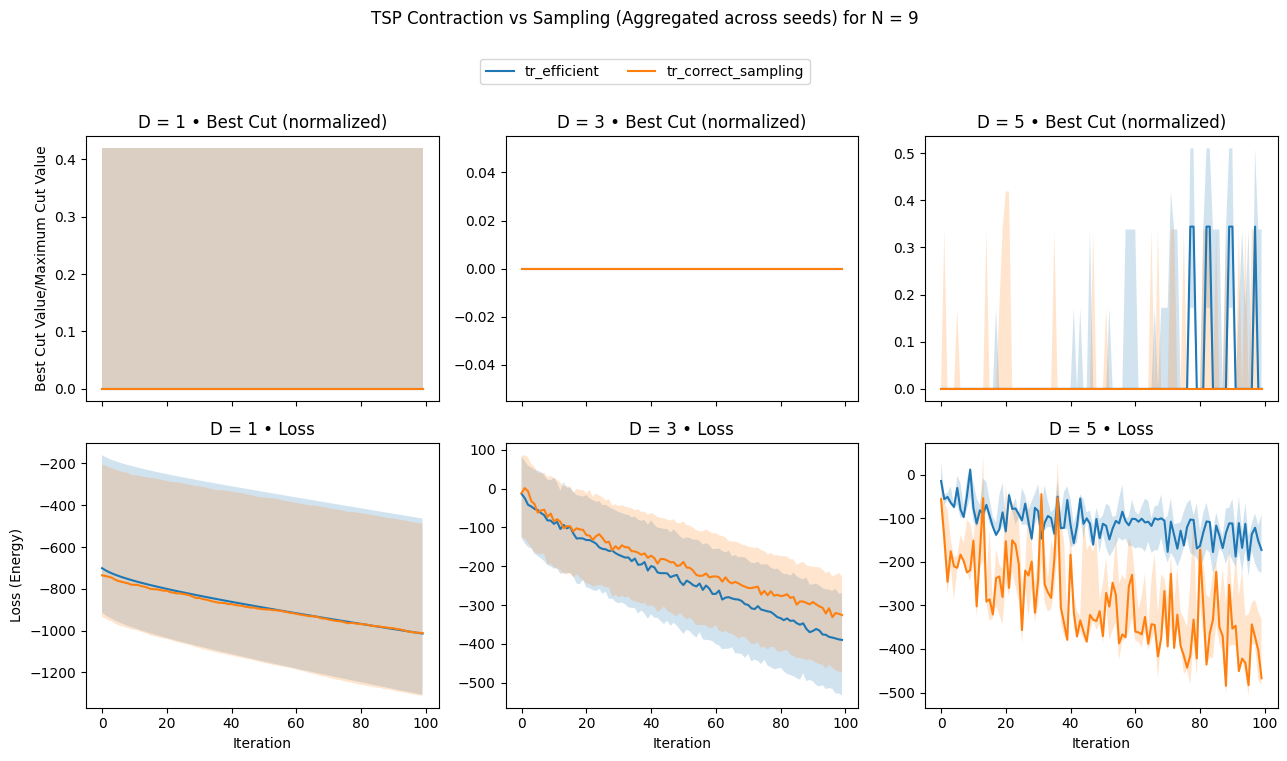

In [38]:
# Example
plot_2x3_contraction_vs_sampling(
    depths=(1,3,5),
    contraction_method="tr_efficient",
    sampling_method="tr_correct_sampling",
    cut_off_it=100,
    denoise_best="rolling",   # or "running_best"
    denoise_loss="rolling",
    rolling_window=1,
    outdir="bench_tsp_4816",
    all_graph=exp_grid_loaded,  # if you use per-seed graph lookup
    N=9,                   # optionally filter a specific N
    seeds=None,               # or pass [0,1,2]
    optim=None,               # e.g., ["AdamW"]
    contraction_label="tr_efficient",
    sampling_label="tr_correct_sampling",
)

In [ ]:
i = 0
for i in range(2,5):
    for j in range(10):
        # print("N:", i, " graph_id:", j)
        graph_lookup = {(g['N'], g['graph_id']): g['G'] for g in exp_grid_loaded}
        g = graph_lookup[(i**2,j)]  # example graph

        temp_tsp = Tsp(g)
        val = solve_tsp_gurobi(nx.to_numpy_array(temp_tsp.graph))
        qp = temp_tsp.to_quadratic_program()
        qp2qubo = QuadraticProgramToQubo()
        qubo_temp = qp2qubo.convert(qp)
        qubitOp, offset = qubo_temp.to_ising()
        maximum_cut = val[1]
        #print("maximum cut" , maximum_cut)
        from qiskit_algorithms import NumPyMinimumEigensolver

        ee = NumPyMinimumEigensolver()
        result = ee.compute_minimum_eigenvalue(qubitOp)
        #print("energy:", result.eigenvalue.real)
        #print("tsp objective:", result.eigenvalue.real + offset)
        x = tsp.sample_most_likely(result.eigenstate)
        print('is maxcut == tsp objective?', (result.eigenvalue.real + offset) == maximum_cut)
        if (result.eigenvalue.real + offset) != maximum_cut:
            print("N:", i, " graph_id:", j , maximum_cut, result.eigenvalue.real + offset)
        #print(x)
        #print("feasible:", qubo_temp.is_feasible(x))
        # z = tsp.interpret(x)
        #print("solution:", z)
        #print("solution objective:", tsp.tsp_value(z, temp_tsp.graph))

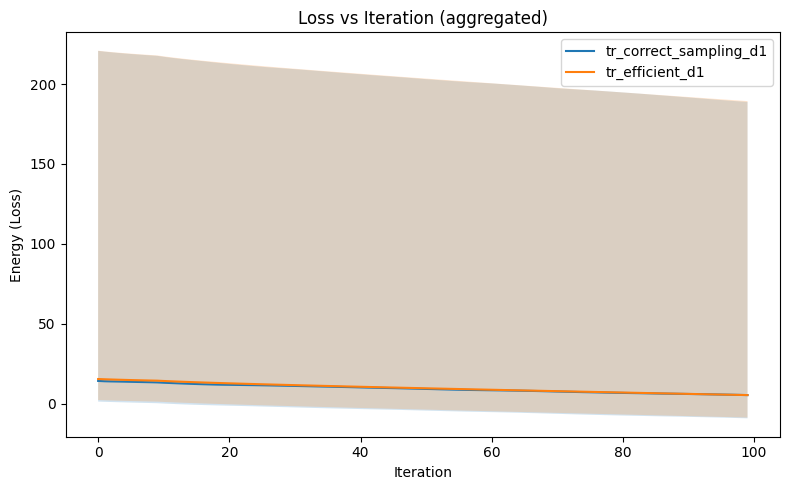

In [ ]:
# # Suppose you have several seeds for each depth
# method_to_runids = {
#     "tr_efficient_d1": [ "run_id_seed1", "run_id_seed2", "run_id_seed3" ],
#     "tr_efficient_d2": [ "run_id_seed1", "run_id_seed2" ],
#     "tr_efficient_d3": [ "run_id_seed1", "run_id_seed2", "run_id_seed3" ],
# }
i =1
#N = N_list[i]
N = 4
all_methods = ['tr_efficient', 'tr_correct_sampling']
method_to_runids = get_method_to_runids(
    outdir="bench_tsp_4816",
    methods=  ['tr_efficient','tr_correct_sampling'],
    depths=[1,2],
    N=N
)
# plot_compare_best_cut_aggregated(
#     method_to_runids,
#     gurobi_max=maxcut_value(loaded_graphs[i]),
#     g=loaded_graphs[i],
#     cut_off_it=300,
#     denoise="rolling",
#     rolling_window=20,
#     outdir="bench_tsp_4816"
# )
# plot aggregated loss curves
plot_compare_loss_aggregated(
    method_to_runids,
    cut_off_it=300,
    denoise="rolling",
    rolling_window=10,
    ylabel="Energy (Loss)",
    outdir="bench_tsp_4816"
)


In [25]:
with open("experiment_grid_tsp.json", "r") as f:
    loaded = json.load(f)

def keys_to_int(d):
    """Recursively convert all string keys that look like integers to int."""
    if isinstance(d, dict):
        new_dict = {}
        for k, v in d.items():
            # Convert numeric string keys to int
            new_key = int(k) if isinstance(k, str) and k.isdigit() else k
            new_dict[new_key] = keys_to_int(v)
        return new_dict
    else:
        return d

exp_grid_loaded = [keys_to_int(entry) for entry in loaded]

In [ ]:
def get_labels_from_summary(run_ids: list[str], summary_csv: str = "bench_out/summary.csv") -> list[str]:
    summary = read_summary(summary_csv)
    label_map = {row["run_id"]: row["method"] + " D = " + row['depth'] for row in summary}
    return [label_map.get(rid, rid) for rid in run_ids]
i = 1
N = N_list[i]
print(N)
# 2) Compare methods at same N/seed using summary.csv
rids = find_runs("bench_out/summary.csv", method=None, N=N, seed=0)
labels = get_labels_from_summary(rids, "bench_out/summary.csv")
plot_compare_loss(rids, labels=labels, cut_off_it=100) 
plot_compare_best_cut(rids, labels=labels, gurobi_max= maxcut_value(loaded_graphs[i]), g=loaded_graphs[i], cut_off_it=100, denoise="rolling", rolling_window=5)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

def get_final_values_by_method(N: int, g, summary_csv="bench_out/summary.csv"):
    """
    For a given problem size N, collect final exp_values for each method across seeds.
    Returns: dict {method: [final values...]}.
    """
    rows = read_summary(summary_csv)
    values = {}
    for row in rows:
        if row["N"] != N:
            continue
        method = row["method"]
        rid = row["run_id"]
        data = read_iter_csv(rid)
        final_val = data["best_results"][-1]
        final_val = compute_maxcut_value(final_val, g)  # convert bitstring to cut value
        values.setdefault(method, []).append(final_val)
    return values
def plot_final_ratio_vs_N(
    N_list,
    gurobi_ref,
    g,
    summary_csv="bench_out/summary.csv",
    methods_order=None,
    colors=None,
    use_best=True,   # if True, use best value in exp_values instead of just last
):
    """
    Plot method performance normalized by Gurobi value.
    Ratio = best_or_final_value / gurobi_value
    """
    methods = set()
    stats = {}

    for N,g_elm in zip(N_list,g):
        vals = get_final_values_by_method(N, g_elm, summary_csv)
        for m, arr in vals.items():
            methods.add(m)
            # Normalize values
            g_val = gurobi_ref[N]
            norm_arr = [v / g_val for v in arr]
            mean = np.mean(norm_arr)
            std = np.std(norm_arr)
            stats.setdefault(m, {"N": [], "mean": [], "std": []})
            stats[m]["N"].append(N)
            stats[m]["mean"].append(mean)
            stats[m]["std"].append(std)

    methods = list(methods_order or sorted(methods))
    colors = colors or plt.cm.tab10.colors

    plt.figure(figsize=(8, 5))
    for i, m in enumerate(methods):
        d = stats[m]
        plt.errorbar(
            d["N"],
            d["mean"],
            yerr=d["std"],
            marker="o",
            capsize=4,
            label=m,
            color=colors[i % len(colors)]
        )

    # Gurobi baseline = 1 for all N
    Ns = sorted(gurobi_ref.keys())
    plt.plot(Ns, [1.0]*len(Ns), color="black", linestyle="--", marker="s", label="Gurobi (100%)")

    plt.xlabel("MaxCut Graph Size (# nodes)")
    plt.ylabel("Performance Ratio (Method / Gurobi)")
    plt.title("Final performance ratio by method vs. graph size")
    plt.ylim(bottom=0)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
import torch
import numpy as np
import json
import os

num_params = 100          # number of parameters in your ansatz
seeds = list(range(10))       # 10 seeds: 0..9
save_dir = "theta_inits"      # folder to save all
os.makedirs(save_dir, exist_ok=True)

for seed in seeds:
    g = torch.Generator(device="cpu").manual_seed(seed)
    # Uniform angle in [-π, π]
    theta_init = (2 * torch.pi) * torch.rand(num_params, generator=g) - torch.pi

    # Save tensor
    torch.save(theta_init, f"{save_dir}/theta_init_s{seed}_extra.pt")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def _match_depth(row, depth_filter):
    """
    Return True if the row passes the depth filter.
    Tries common keys: 'depth', 'D', 'ansatz_depth'.
    """
    if depth_filter is None:
        return True

    # Try to discover a depth-like field
    depth = None
    for k in ("depth", "D", "ansatz_depth"):
        if k in row:
            depth = row[k]
            break

    # If no depth field found, only pass when filter is None (already handled)
    if depth is None:
        return False

    # Callable for custom logic
    if callable(depth_filter):
        return bool(depth_filter(row))

    # Exact integer
    if isinstance(depth_filter, int):
        return int(depth) == depth_filter

    # Range tuple (min, max), inclusive
    if isinstance(depth_filter, tuple) and len(depth_filter) == 2:
        lo, hi = depth_filter
        return (lo is None or depth >= lo) and (hi is None or depth <= hi)

    # Iterable set/list of allowed depths
    try:
        return int(depth) in set(depth_filter)
    except Exception:
        return False


def get_final_values_by_method(
    N: int,
    g,
    summary_csv="bench_out/summary.csv",
    *,
    use_best: bool = True,
    depth_filter=None,
):
    """
    For a given N (graph size), collect per-method MaxCut *cut values* (not energy),
    optionally filtered by circuit depth.

    - If use_best=True: use the best cut found over all iterations for each run.
    - Else: use the final iteration's best_result (bitstring) only.
    """
    rows = read_summary(summary_csv)
    values = {}
    for row in rows:
        if row.get("N") != N:
            continue
        if not _match_depth(row, depth_filter):
            continue

        method = row["method"]
        rid = row["run_id"]
        data = read_iter_csv(rid)

        if use_best:
            # best over trajectory
            best_over_time = -np.inf
            for b in data.get("best_results", []):
                if b is None:
                    continue
                try:
                    cut_val = compute_maxcut_value(b, g)
                except Exception:
                    continue
                if cut_val > best_over_time:
                    best_over_time = cut_val
            if np.isfinite(best_over_time):
                values.setdefault(method, []).append(best_over_time)
        else:
            # final-only
            b = data.get("best_results", [None])[-1]
            if b is None:
                continue
            try:
                final_cut = compute_maxcut_value(b, g)
                values.setdefault(method, []).append(final_cut)
            except Exception:
                continue

    return values


def plot_final_ratio_vs_N(
    N_list,
    gurobi_ref,   # dict {N: gurobi_cut_value}
    g_list,       # list of graphs aligned with N_list
    summary_csv="bench_out/summary.csv",
    methods_order=None,
    colors=None,
    use_best=True,      # True: best over iters; False: final only
    depth_filter=None,  # see _match_depth() for accepted forms
):
    """
    Plot method performance normalized by Gurobi: ratio = method_cut / gurobi_cut.
    Applies an optional depth filter to include only runs matching the desired depth.
    """
    assert len(N_list) == len(g_list), "N_list and g_list must have the same length"

    methods = set()
    stats = {}

    for N, g in zip(N_list, g_list):
        vals = get_final_values_by_method(
            N,
            g,
            summary_csv=summary_csv,
            use_best=use_best,
            depth_filter=depth_filter,
        )
        if N not in gurobi_ref or gurobi_ref[N] is None or gurobi_ref[N] == 0:
            # Skip if no valid reference for this N
            continue
        g_val = float(gurobi_ref[N])

        for m, arr in vals.items():
            if not arr:
                continue
            methods.add(m)
            norm_arr = [v / g_val for v in arr if np.isfinite(v)]
            if not norm_arr:
                continue
            mean = float(np.mean(norm_arr))
            std  = float(np.std(norm_arr))
            slot = stats.setdefault(m, {"N": [], "mean": [], "std": []})
            slot["N"].append(N)
            slot["mean"].append(mean)
            slot["std"].append(std)

    if not methods:
        print("No data to plot after applying filters.")
        return

    methods = list(methods_order or sorted(methods))
    colors = colors or plt.cm.tab10.colors

    plt.figure(figsize=(8, 5))
    for i, m in enumerate(methods):
        if m not in stats:
            continue
        d = stats[m]
        # Sort by N to draw clean lines
        order = np.argsort(d["N"])
        Ns = np.array(d["N"])[order].tolist()
        means = np.array(d["mean"])[order].tolist()
        stds  = np.array(d["std"])[order].tolist()

        plt.errorbar(
            Ns,
            means,
            yerr=stds,
            marker="o",
            capsize=4,
            label=m,
            color=colors[i % len(colors)]
        )

    # Baseline at 1.0
    Ns_all = sorted(n for n in gurobi_ref.keys() if n in N_list)
    if Ns_all:
        plt.plot(Ns_all, [1.0]*len(Ns_all), linestyle="--", marker="s", color="black", label="Gurobi (100%)")

    plt.xlabel("MaxCut Graph Size (# nodes)")
    plt.ylabel("Performance Ratio (Method / Gurobi)")
    title_suffix = "best-so-far" if use_best else "final-only"
    # Show depth filter in the title, if any
    if depth_filter is None:
        depth_txt = ""
    elif isinstance(depth_filter, int):
        depth_txt = f" • depth={depth_filter}"
    elif isinstance(depth_filter, tuple) and len(depth_filter) == 2:
        depth_txt = f" • depth∈[{depth_filter[0]}, {depth_filter[1]}]"
    else:
        depth_txt = " • depth filtered"

    plt.title(f"Performance ratio vs. graph size ({title_suffix}){depth_txt}")
    plt.ylim(bottom=0)
    plt.legend()
    plt.tight_layout()
    plt.show()


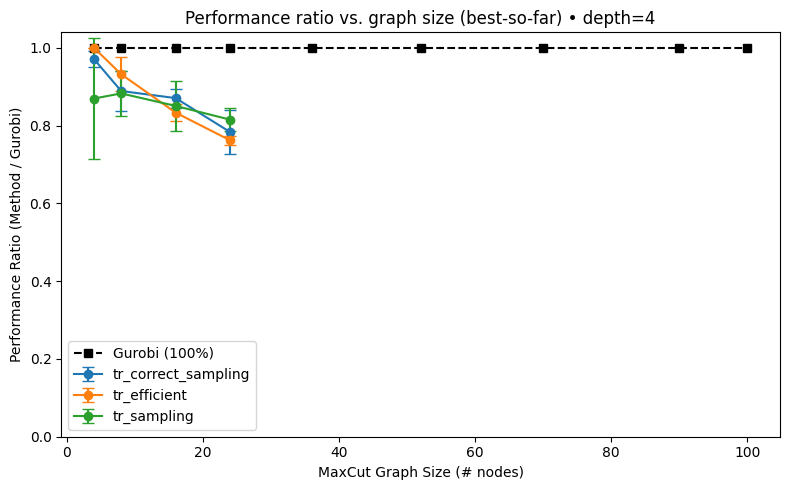

In [ ]:
N_list = [4, 8, 16, 24, 36, 52, 70, 90, 100]
gurobi_ref = {}
for n, g in zip(N_list, loaded_graphs[:len(N_list)]):
    gurobi_ref[n] = maxcut_value(g)

plot_final_ratio_vs_N(N_list, gurobi_ref, g_list=loaded_graphs[:len(N_list)], summary_csv="bench_out/summary.csv", depth_filter=4)


In [ ]:
theta_init = torch.load("theta_init_S0.pt")
print(theta_init[0])
theta_init = torch.load("theta_init_S2.pt")
print(theta_init[0])

tensor(-0.1126)
tensor(-0.1041)


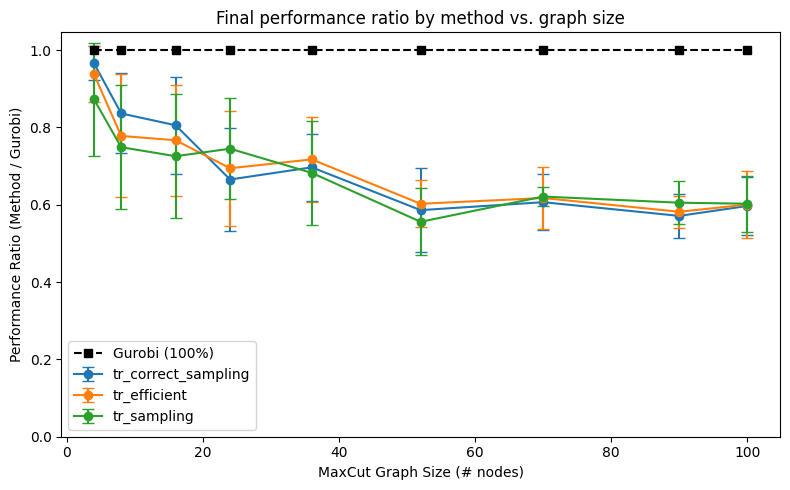

In [ ]:
# Suppose you ran 5 seeds each for N=6,8,10,12
N_list = [4, 8, 16, 24, 36, 52, 70, 90, 100]
gurobi_ref = {}
for n, g in zip(N_list, loaded_graphs[:len(N_list)]):
    gurobi_ref[n] = maxcut_value(g)


plot_final_ratio_vs_N(N_list, gurobi_ref, g=loaded_graphs[:len(N_list)], summary_csv="bench_out/summary.csv")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---- helpers ---------------------------------------------------------------
def _running_min(a: np.ndarray) -> np.ndarray:
    out = np.empty_like(a, dtype=float)
    m = np.inf
    for i, v in enumerate(a):
        if v < m: m = v
        out[i] = m
    return out

def _read_runs_for(N, method, summary_csv="bench_out/summary.csv", outdir="bench_out"):
    """Returns list of exp_value arrays (one per seed) for (N, method)."""
    rids = find_runs(summary_csv, method=method, N=N)
    curves = []
    for rid in rids:
        d = read_iter_csv(rid, outdir)
        curves.append(np.asarray(d["exp_values"], dtype=float))
    return curves  # list of (T_i,)

def _align_curves(curves, align="minlen"):
    """Trim/align to same length for averaging."""
    if not curves: return np.empty((0,)), []
    if align == "minlen":
        T = min(len(c) for c in curves)
        return np.stack([c[:T] for c in curves]), list(range(T))
    # fallback: pad with last value
    T = max(len(c) for c in curves)
    pad = []
    for c in curves:
        if len(c) < T:
            tail = np.full(T - len(c), c[-1])
            pad.append(np.concatenate([c, tail]))
        else:
            pad.append(c)
    return np.stack(pad), list(range(T))

# ---- 1) Small-multiples: running-min (or normalized) per N -----------------
def plot_running_min_by_N(
    N_list,
    methods=("tr_efficient","tr_correct_sampling","tr_sampling"),
    summary_csv="bench_out/summary.csv",
    outdir="bench_out",
    normalize=False,          # if True, divide each curve by its initial value
    sharey=True
):
    cols = min(4, len(N_list))
    rows = int(np.ceil(len(N_list)/cols))
    fig, axes = plt.subplots(rows, cols, figsize=(4.2*cols, 3.2*rows), sharex=False, sharey=sharey)
    axes = np.atleast_1d(axes).ravel()

    for ax, N in zip(axes, N_list):
        for mi, m in enumerate(methods):
            curves = _read_runs_for(N, m, summary_csv, outdir)
            if not curves: 
                continue
            # running min per seed
            curves = [ _running_min(c) for c in curves ]
            if normalize:
                curves = [ c / (c[0] if c[0] != 0 else 1.0) for c in curves ]
            arr, it = _align_curves(curves)
            mean, std = arr.mean(axis=0), arr.std(axis=0)
            ax.plot(it, mean, label=m)
            ax.fill_between(it, mean-std, mean+std, alpha=0.2)
        ax.set_title(f"N={N}")
        ax.set_xlabel("iteration")
        ax.set_ylabel("running-min loss" + (" (normalized)" if normalize else ""))
        ax.grid(alpha=0.2)

    # hide unused axes
    for i in range(len(N_list), len(axes)):
        axes[i].axis("off")

    handles, labels = axes[0].get_legend_handles_labels() if len(N_list)>0 else ([],[])
    if labels:
        fig.legend(handles, labels, loc="upper center", ncol=min(3, len(labels)), frameon=False)
    fig.suptitle("Convergence by N (running-min of loss)", y=1.02)
    fig.tight_layout()
    plt.show()

# ---- 2) Iterations-to-target vs N (convergence summary) --------------------
def plot_iters_to_target_vs_N(
    N_list,
    methods=("tr_efficient","tr_correct_sampling","tr_sampling"),
    summary_csv="bench_out/summary.csv",
    outdir="bench_out",
    target_ratio=0.95,   # reach 95% of (initial_loss - best_seen_across_seeds) improvement
):
    """
    For each (N, method): across seeds, find the first iter where running-min
    <= best_seed_min + target_ratio * (initial_seed - best_seed_min).
    Lower is better (fewer iterations).
    """
    plt.figure(figsize=(8,5))
    for m in methods:
        xs, ys, es = [], [], []
        for N in N_list:
            curves = _read_runs_for(N, m, summary_csv, outdir)
            if not curves: 
                continue
            iters_needed = []
            for c in curves:
                c = np.asarray(c, float)
                rm = _running_min(c)
                init, best = c[0], rm[-1]
                # target value: within (1-target_ratio) fraction of total drop
                target = best + (init - best) * (1 - target_ratio)
                k = np.argmax(rm <= target) if np.any(rm <= target) else len(rm)-1
                iters_needed.append(int(k))
            xs.append(N)
            ys.append(np.mean(iters_needed))
            es.append(np.std(iters_needed))
        if xs:
            plt.errorbar(xs, ys, yerr=es, marker="o", capsize=4, label=m)

    plt.xlabel("N (qubits / nodes)")
    plt.ylabel(f"Iterations to {int(target_ratio*100)}% of improvement")
    plt.title("Convergence speed vs N")
    plt.grid(alpha=0.2)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ---- 3) Optional: normalized final loss vs N (mean±std over seeds) ---------
def plot_final_normalized_vs_N(
    N_list,
    methods=("tr_efficient","tr_correct_sampling","tr_sampling"),
    summary_csv="bench_out/summary.csv",
    outdir="bench_out",
):
    plt.figure(figsize=(8,5))
    for m in methods:
        xs, mu, sd = [], [], []
        for N in N_list:
            curves = _read_runs_for(N, m, summary_csv, outdir)
            if not curves: 
                continue
            finals = []
            for c in curves:
                c = np.asarray(c, float)
                # normalized by initial value
                finals.append(c[-1] / (c[0] if c[0] != 0 else 1.0))
            xs.append(N); mu.append(np.mean(finals)); sd.append(np.std(finals))
        if xs:
            plt.errorbar(xs, mu, yerr=sd, marker="o", capsize=4, label=m)

    plt.xlabel("N")
    plt.ylabel("Final loss / initial loss")
    plt.title("Normalized final loss vs N (lower is better)")
    plt.grid(alpha=0.2); plt.legend(); plt.tight_layout(); plt.show()


[{'run_id': 'd4dd18c3', 'method': 'tr_efficient', 'N': 4, 'depth': '5', 'seed': 0, 'theta_path': 'bench_out/theta_d4dd18c3.pt', 'iter_csv': 'bench_out/iter_d4dd18c3.csv'}, {'run_id': '8fbe4555', 'method': 'tr_correct_sampling', 'N': 4, 'depth': '5', 'seed': 0, 'theta_path': 'bench_out/theta_8fbe4555.pt', 'iter_csv': 'bench_out/iter_8fbe4555.csv'}, {'run_id': '2be346b9', 'method': 'tr_sampling', 'N': 4, 'depth': '5', 'seed': 0, 'theta_path': 'bench_out/theta_2be346b9.pt', 'iter_csv': 'bench_out/iter_2be346b9.csv'}, {'run_id': '90240eb1', 'method': 'tr_efficient', 'N': 4, 'depth': '5', 'seed': 1, 'theta_path': 'bench_out/theta_90240eb1.pt', 'iter_csv': 'bench_out/iter_90240eb1.csv'}, {'run_id': 'fb94ef3e', 'method': 'tr_correct_sampling', 'N': 4, 'depth': '5', 'seed': 1, 'theta_path': 'bench_out/theta_fb94ef3e.pt', 'iter_csv': 'bench_out/iter_fb94ef3e.csv'}, {'run_id': '371e5963', 'method': 'tr_sampling', 'N': 4, 'depth': '5', 'seed': 1, 'theta_path': 'bench_out/theta_371e5963.pt', 'iter

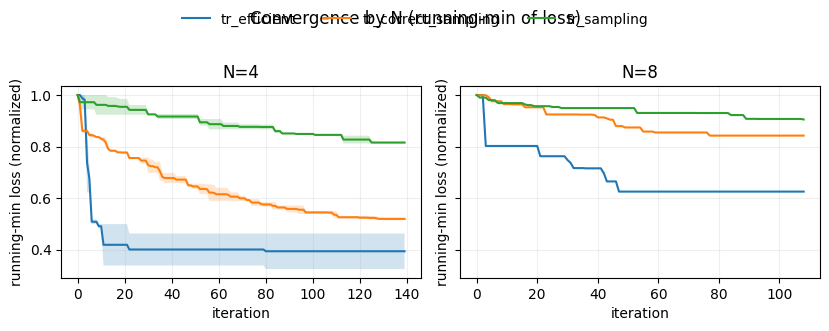

[{'run_id': 'd4dd18c3', 'method': 'tr_efficient', 'N': 4, 'depth': '5', 'seed': 0, 'theta_path': 'bench_out/theta_d4dd18c3.pt', 'iter_csv': 'bench_out/iter_d4dd18c3.csv'}, {'run_id': '8fbe4555', 'method': 'tr_correct_sampling', 'N': 4, 'depth': '5', 'seed': 0, 'theta_path': 'bench_out/theta_8fbe4555.pt', 'iter_csv': 'bench_out/iter_8fbe4555.csv'}, {'run_id': '2be346b9', 'method': 'tr_sampling', 'N': 4, 'depth': '5', 'seed': 0, 'theta_path': 'bench_out/theta_2be346b9.pt', 'iter_csv': 'bench_out/iter_2be346b9.csv'}, {'run_id': '90240eb1', 'method': 'tr_efficient', 'N': 4, 'depth': '5', 'seed': 1, 'theta_path': 'bench_out/theta_90240eb1.pt', 'iter_csv': 'bench_out/iter_90240eb1.csv'}, {'run_id': 'fb94ef3e', 'method': 'tr_correct_sampling', 'N': 4, 'depth': '5', 'seed': 1, 'theta_path': 'bench_out/theta_fb94ef3e.pt', 'iter_csv': 'bench_out/iter_fb94ef3e.csv'}, {'run_id': '371e5963', 'method': 'tr_sampling', 'N': 4, 'depth': '5', 'seed': 1, 'theta_path': 'bench_out/theta_371e5963.pt', 'iter

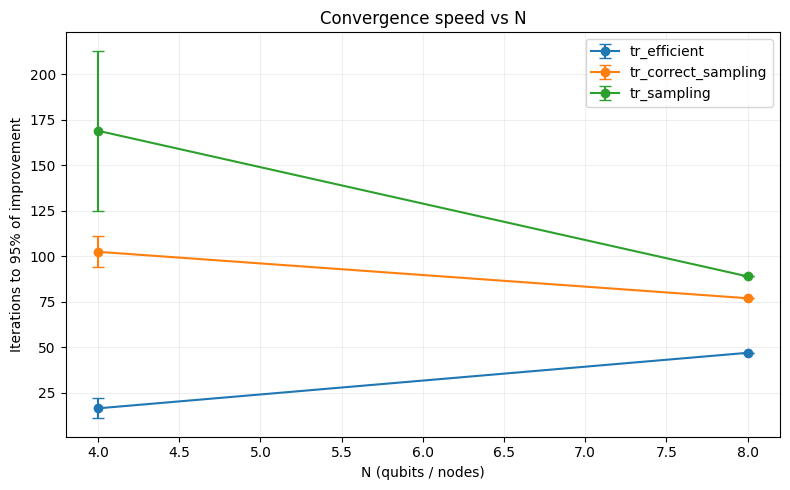

[{'run_id': 'd4dd18c3', 'method': 'tr_efficient', 'N': 4, 'depth': '5', 'seed': 0, 'theta_path': 'bench_out/theta_d4dd18c3.pt', 'iter_csv': 'bench_out/iter_d4dd18c3.csv'}, {'run_id': '8fbe4555', 'method': 'tr_correct_sampling', 'N': 4, 'depth': '5', 'seed': 0, 'theta_path': 'bench_out/theta_8fbe4555.pt', 'iter_csv': 'bench_out/iter_8fbe4555.csv'}, {'run_id': '2be346b9', 'method': 'tr_sampling', 'N': 4, 'depth': '5', 'seed': 0, 'theta_path': 'bench_out/theta_2be346b9.pt', 'iter_csv': 'bench_out/iter_2be346b9.csv'}, {'run_id': '90240eb1', 'method': 'tr_efficient', 'N': 4, 'depth': '5', 'seed': 1, 'theta_path': 'bench_out/theta_90240eb1.pt', 'iter_csv': 'bench_out/iter_90240eb1.csv'}, {'run_id': 'fb94ef3e', 'method': 'tr_correct_sampling', 'N': 4, 'depth': '5', 'seed': 1, 'theta_path': 'bench_out/theta_fb94ef3e.pt', 'iter_csv': 'bench_out/iter_fb94ef3e.csv'}, {'run_id': '371e5963', 'method': 'tr_sampling', 'N': 4, 'depth': '5', 'seed': 1, 'theta_path': 'bench_out/theta_371e5963.pt', 'iter

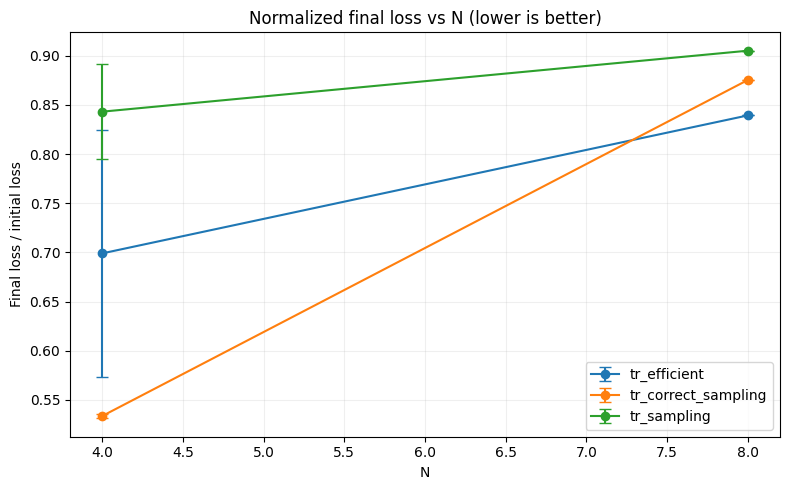

In [ ]:
Ns = [4,8]  # whatever you ran
# 1) Faceted convergence curves (mean±std across seeds)
plot_running_min_by_N(Ns, normalize=True)

# 2) Convergence speed summary (iterations needed to get close to best)
plot_iters_to_target_vs_N(Ns, target_ratio=0.95)

# 3) Final normalized loss vs N
plot_final_normalized_vs_N(Ns)


In [ ]:
import torch
from torch.autograd import Function
from qiskit.circuit.library import QAOAAnsatz
from qiskit.quantum_info import SparsePauliOp, Statevector
from qiskit import QuantumCircuit

def run_circuit_sv(theta,N,D,h, isRing):
    c = QuantumCircuit(N)
    theta_t = 0
    for i in range(D):
        for ind1 in range(N):
            c.rx(theta[theta_t].detach().cpu().item(), ind1)
            theta_t+=1
        for ind1 in range(N):
            c.rz(theta[theta_t].detach().cpu().item(), ind1)
            theta_t+=1
        for ind1 in range(N-1):
            c.cx(ind1, ind1+1)
        if isRing:
            c.cx(N-1,0)  # Add a CX to make it more complex
    sv = Statevector(c).expectation_value(h)
    return sv.real
def get_opt_cut_sv(theta,N,D,h, isRing):
    c = QuantumCircuit(N)
    t = 0
    for i in range(D):
        for j in range(N):
            c.rx(theta[t].detach().cpu().item(), j)
            t+=1
        for j in range(N):
            c.rz(theta[t].detach().cpu().item(), j)
            t+=1
        for j in range(N-1):
            c.cx(j, j+1)
        if isRing:
            c.cx(N-1,0)  # Add a CX to make it more complex
    sv = Statevector(c)
    my_dict = (sv.probabilities_dict())
    max_key = min(my_dict, key=my_dict.get)
    #print("min key" , max_key)
    probabilities = np.abs(sv) ** 2
    # Step 2: Get index of highest probabili
    max_index = probabilities.argmax()
    return format(max_index,f'0{N}b')

# Custom PyTorch autograd function
class QuantumFunction(Function):
    @staticmethod
    def forward(ctx, theta, gates, N, h, D, isRing):
        ctx.save_for_backward(theta)
        ctx.gates = gates
        ctx.N = N
        ctx.D = D
        ctx.h = h
        ctx.isRing = isRing
        output = run_circuit_sv(theta.detach(), N,D,h, isRing)
        return torch.tensor([output], dtype=torch.float32)
    @staticmethod
    def backward(ctx, grad_output):
        theta, = ctx.saved_tensors
        grad = parameter_shift_grad_sv(theta.detach(), ctx.gates, ctx.N, ctx.D, ctx.h, ctx.isRing)
        return grad_output *grad, None, None, None, None, None
# Parameter-shift gradient manually
def parameter_shift_grad_sv(params, gates, N, D, h, isRing):
    gradients = np.zeros_like(params)
    shift = torch.tensor(torch.pi / 2)
    for i in range(len(params)):
        params_forward = params.clone()
        params_backward = params.clone()
        params_forward[i] += shift
        params_backward[i] -= shift
        gradients[i] = (run_circuit_sv(params_forward,N,D,h, isRing) - run_circuit_sv(params_backward, N,D,h, isRing)) / 2
    return gradients

# Wrap into a PyTorch module
class QuantumCircuitTorch(torch.nn.Module):
    def __init__(self, theta, N, D, h, isRing=True):
        super().__init__()
        self.N = N
        self.D = D
        self.h = h
        self.gates = []
        self.isRing = isRing
        self.theta = torch.nn.Parameter(torch.tensor(theta, requires_grad=False))

    def forward(self):
        return QuantumFunction.apply(self.theta, self.gates, self.N, self.h, self.D, self.isRing)


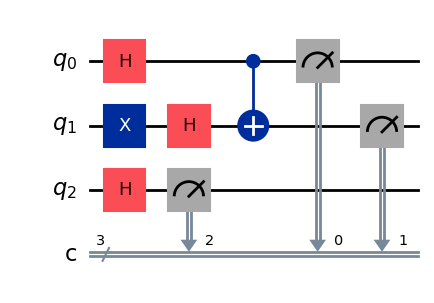

In [ ]:
from qiskit import QuantumCircuit
# Build a quantum circuit
circuit = QuantumCircuit(3, 3)
circuit.x(1)
circuit.h(range(3))
circuit.cx(0, 1)
circuit.measure(range(3), range(3))
# Matplotlib drawing
circuit.draw(output="mpl")

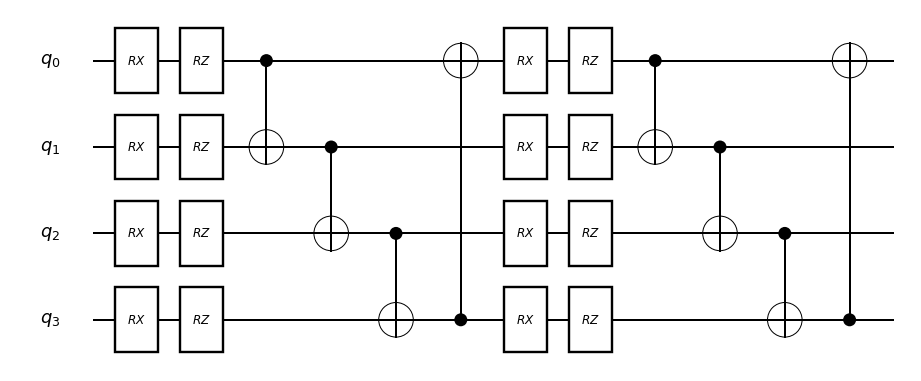

In [ ]:
from qulacs import QuantumCircuit
from qulacsvis import circuit_drawer
# Build a quantum circuit
N = 4
D = 1
circuit = QuantumCircuit(N)
tc = 0
placehoder = 'value'
for i in range(D):
    for j in range(N):
        circuit.add_RotX_gate(j , 0)
        tc += 1
    for j in range(N):
        circuit.add_RotZ_gate(j , 0)
        tc += 1
    for j in range(N-1):
        circuit.add_CNOT_gate(j, j+1)
    circuit.add_CNOT_gate(N-1,0)  # Add a CX to make it more complex 
    circuit.merge_circuit(circuit)
# circuit.add_X_gate(0)
# circuit.add_Y_gate(1)
# circuit.add_Z_gate(2)
# circuit.add_dense_matrix_gate(
#     [0, 1], [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]]
# )
# circuit.add_CNOT_gate(2, 0)
# circuit.add_X_gate(2)

# Draw a quantum circuit
circuit_drawer(circuit, "mpl")

In [ ]:
torch.cuda.empty_cache()